In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = load_iris()
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
iris_df = pd.DataFrame(df.data, columns=df.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df["target"] = df.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.drop(iris_df[["sepal length (cm)","sepal width (cm)","target"]], axis=1,inplace=True)
iris_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'petal width (cm)')

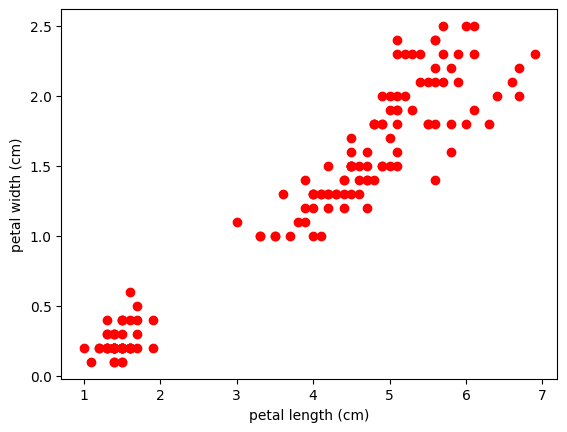

In [7]:
plt.scatter(iris_df["petal length (cm)"],iris_df["petal width (cm)"], color="r")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [8]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(iris_df[["petal length (cm)","petal width (cm)"]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3], dtype=int32)

In [9]:
iris_df["cluster"] = y_pred
iris_df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,3
147,5.2,2.0,3
148,5.4,2.3,0


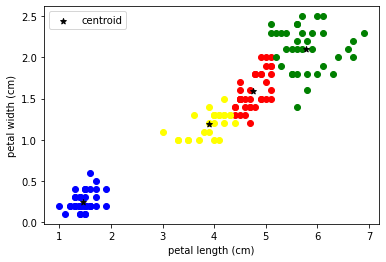

In [ ]:
df1 = iris_df[iris_df.cluster==0]
df2 = iris_df[iris_df.cluster==1]
df3 = iris_df[iris_df.cluster==2]
df4 = iris_df[iris_df.cluster==3]

plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"], color="r")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"], color="b")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"], color="g")
plt.scatter(df4["petal length (cm)"],df4["petal width (cm)"], color="yellow")
plt.scatter(km.cluster_centers_[:,0],  km.cluster_centers_[:,1], color="black", marker="*", label="centroid")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [ ]:
scaler = MinMaxScaler()
iris_df["petal length (cm)"] = scaler.fit_transform(iris_df[["petal length (cm)"]])

iris_df["petal width (cm)"] = scaler.fit_transform(iris_df[["petal width (cm)"]])
iris_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(iris_df[["petal length (cm)","petal width (cm)"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0])

In [ ]:
iris_df["cluster"] = y_pred
iris_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


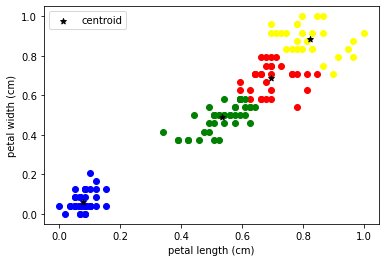

In [ ]:
df1 = iris_df[iris_df.cluster==0]
df2 = iris_df[iris_df.cluster==1]
df3 = iris_df[iris_df.cluster==2]
df4 = iris_df[iris_df.cluster==3]

plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"], color="r")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"], color="b")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"], color="g")
plt.scatter(df4["petal length (cm)"],df4["petal width (cm)"], color="yellow")
plt.scatter(km.cluster_centers_[:,0],  km.cluster_centers_[:,1], color="black", marker="*", label="centroid")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [ ]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris_df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)
sse

C:\Users\OWNER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1588792731667124,
 0.8535683225340072,
 0.6800800986587509,
 0.566351649289804,
 0.48699860502649284,
 0.41326677825124736]

Text(0, 0.5, 'sse')

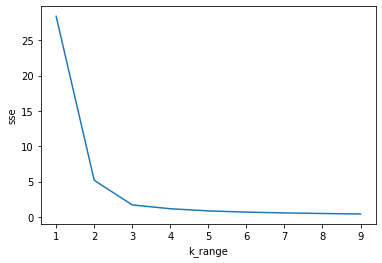

In [ ]:
plt.plot(k_range,sse)
plt.xlabel("k_range")
plt.ylabel("sse")

In [ ]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(iris_df[["petal length (cm)","petal width (cm)"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_df["cluster"] = y_pred
iris_df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


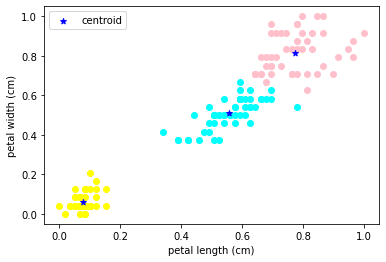

In [ ]:
df1 = iris_df[iris_df.cluster==0]
df2 = iris_df[iris_df.cluster==1]
df3 = iris_df[iris_df.cluster==2]


plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"], color="cyan")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"], color="yellow")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"], color="pink")

plt.scatter(km.cluster_centers_[:,0],  km.cluster_centers_[:,1], color="b", marker="*", label="centroid")

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()